In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d imbikramsaha/cat-breads

 97% 201M/208M [00:00<00:00, 268MB/s]
100% 208M/208M [00:00<00:00, 258MB/s]


In [6]:
! unzip cat-breads.zip

Archive:  cat-breads.zip
  inflating: cats-breads/Abyssinian/Abyssinian_1.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_10.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_100.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_100.mat  
  inflating: cats-breads/Abyssinian/Abyssinian_101.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_101.mat  
  inflating: cats-breads/Abyssinian/Abyssinian_102.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_102.mat  
  inflating: cats-breads/Abyssinian/Abyssinian_103.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_104.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_105.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_106.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_107.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_108.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_109.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_11.jpg  
  inflating: cats-breads/Abyssinian/Abyssinian_110.jpg  
  inflatin

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
path = Path('./cats-breads')
path.ls()

(#13) [Path('cats-breads/Egyptian_Mau'),Path('cats-breads/Maine_Coon'),Path('cats-breads/Birman'),Path('cats-breads/models'),Path('cats-breads/Bengal'),Path('cats-breads/Bombay'),Path('cats-breads/Sphynx'),Path('cats-breads/British_Shorthair'),Path('cats-breads/Russian_Blue'),Path('cats-breads/Siamese')...]

In [5]:
bs = 64

In [6]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), bs=bs)

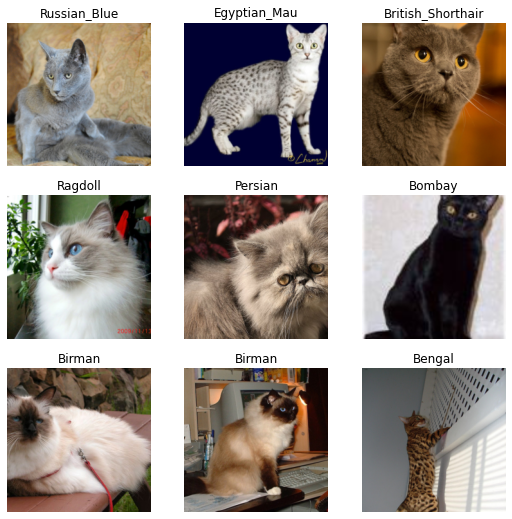

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet152, metrics=[accuracy, error_rate])

SuggestedLRs(valley=0.0003311311302240938)

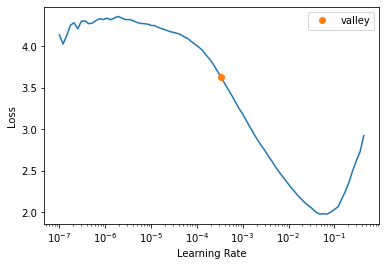

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.250855,0.283565,0.897275,0.102725,00:35


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.297551,0.194637,0.930818,0.069182,00:47
1,0.175204,0.396579,0.893082,0.106918,00:47
2,0.188150,0.510149,0.880503,0.119497,00:47
3,0.201121,0.482457,0.895178,0.104822,00:47
4,0.212161,0.298418,0.922432,0.077568,00:48
5,0.180629,0.301262,0.928721,0.071279,00:47
6,0.119618,0.176560,0.955975,0.044025,00:47
7,0.076267,0.194148,0.951782,0.048218,00:47
8,0.046847,0.197698,0.947589,0.052411,00:47
9,0.028900,0.196532,0.945493,0.054507,00:47


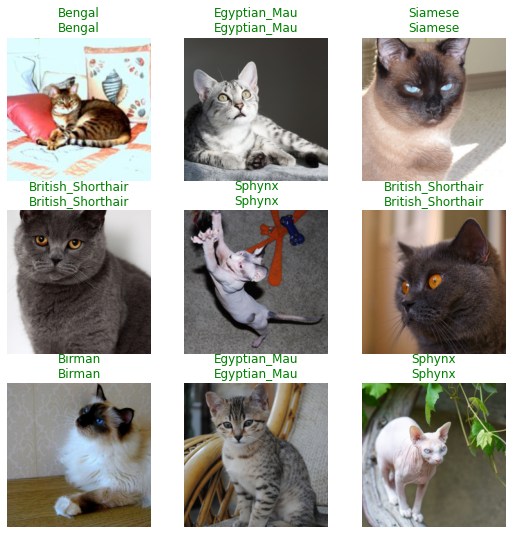

In [11]:
learn.show_results()

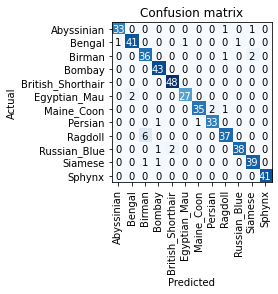

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
learn.path = Path('.')

In [19]:
learn.export(path/'cat-model.pkl')